In [36]:
import pandas as pd
import sklearn.svm

import tensorflow as tf

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR

STONKS ONLY GO UP

1. APPL
2. MSFT
3. TXN
4. SONY
5. GOOG
6. TSLA
7. KO
8. CMG
9. NVDA
10. AMD

Maybe??
1. FB
2. INTC

Stable

1. VOO
2. NASDAQ 100


In [37]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:

  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU

  try:

    tf.config.set_logical_device_configuration(

        gpus[0],

        [tf.config.LogicalDeviceConfiguration(memory_limit=2048)])

    logical_gpus = tf.config.list_logical_devices('GPU')

    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

  except RuntimeError as e:

    # Virtual devices must be set before GPUs have been initialized

    print(e)

In [38]:
#load data
import pandas as pd
import numpy as np

df = pd.read_csv('MSFT.csv')
dataset = df.values
print(df.Date)

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9091    2022-04-06
9092    2022-04-07
9093    2022-04-08
9094    2022-04-11
9095    2022-04-12
Name: Date, Length: 9096, dtype: object


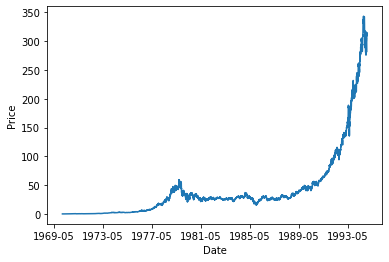

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

fmt_half_year = mdates.MonthLocator(interval=48)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.plot(df.Date, df.Close)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [40]:
dataset = df.drop(['Date'], axis=1)
feature_columns = ['Open']
train_X = df.loc[:,feature_columns]
train_y = df.Close

dataset = dataset.astype('float64')
def create_dataset(n_X, look_back):
    data_X, data_y = [],[]
    for i in range(len(n_X) - look_back):
        a = n_X[i:(i+look_back),]
        data_X.append(a)
        data_y.append(n_X[i + look_back, ])

train_X = train_X.values
print(len(train_X))
reshaped_train_x = train_X.reshape(1, 9096, 1)
train_y = train_y.values
print(train_X.flatten())


9096
[8.85420000e-02 9.72220000e-02 1.00694000e-01 ... 3.00440002e+02
 2.91790009e+02 2.89239990e+02]


In [41]:
from sklearn.svm import SVR


model = SVR(kernel='rbf')

In [42]:
'''
  Drops the date column from the dataframe
'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('KO.csv')

df['Date']= pd.to_datetime(df['Date'])
split_date = pd.datetime(2015, 1, 1)
training_dataframe = df.loc[df['Date'] <= split_date]
testing_dataframe = df.loc[df['Date'] > split_date]

split_date = pd.datetime(2000, 1, 1)
training_dataframe = df.loc[df['Date'] >= split_date]

training_dataframe = training_dataframe[['Open', 'Close', 'Volume']]
testing_dataframe = testing_dataframe[['Open', 'Close', 'Volume']]
print(training_dataframe.head())
print(testing_dataframe.head())

          Open     Close    Volume
9569  29.00000  28.18750  10997000
9570  28.18750  28.21875   7308000
9571  28.21875  28.46875   9457400
9572  28.46875  28.50000   7129200
9573  28.93750  30.37500  11474000
            Open      Close    Volume
13342  42.259998  42.139999   9921100
13343  42.689999  42.139999  26292600
13344  42.410000  42.459999  16897500
13345  42.799999  42.990002  13412300
13346  43.180000  43.509998  21743600


C:\Users\elilo\AppData\Local\Temp\ipykernel_33024\3040605076.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2015, 1, 1)
C:\Users\elilo\AppData\Local\Temp\ipykernel_33024\3040605076.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2000, 1, 1)


In [43]:
print(training_dataframe.values)
train_X = training_dataframe[['Open']].values
train_y = training_dataframe[['Close']].values
test_X = testing_dataframe[['Open']].values
test_y = testing_dataframe[['Close']].values
model.fit(train_X, train_y)

[[2.9000000e+01 2.8187500e+01 1.0997000e+07]
 [2.8187500e+01 2.8218750e+01 7.3080000e+06]
 [2.8218750e+01 2.8468750e+01 9.4574000e+06]
 ...
 [6.3480000e+01 6.3830002e+01 1.2702700e+07]
 [6.3910000e+01 6.3810001e+01 1.2720100e+07]
 [6.4379997e+01 6.4559998e+01 1.8089900e+07]]


C:\Users\elilo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

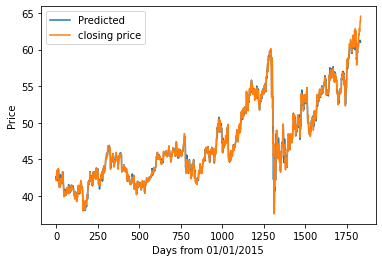

In [44]:
prediction = model.predict(test_X)

plt.plot(prediction, label="Predicted")
plt.plot(testing_dataframe[['Close']].values.flatten(), label="closing price")
plt.ylabel("Price")
plt.xlabel("Days from 01/01/2015")
plt.legend()

In [45]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(test_y.flatten(), prediction)
print("This is the mse for SVC:" + str(score))

This is the mse for SVC:0.2353647088587894
